In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('E:/avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df[['Year','Month','Day']]=df['Date'].str.split('-',expand=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29


In [8]:
df['Year']=pd.to_numeric(df['Year'])

In [9]:
df['Month']=pd.to_numeric(df['Month'])

In [10]:
df['Day']=pd.to_numeric(df['Day'])

In [11]:
df.drop(['Date','year'],axis=1,inplace=True)

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


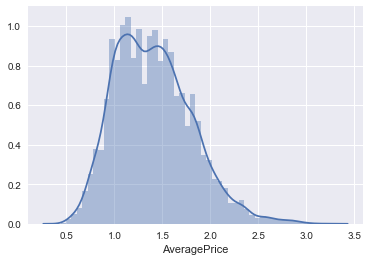

In [13]:
#here we see that the average price of all years is 1.5
sns.distplot(df['AveragePrice'])

(0, 2000000)

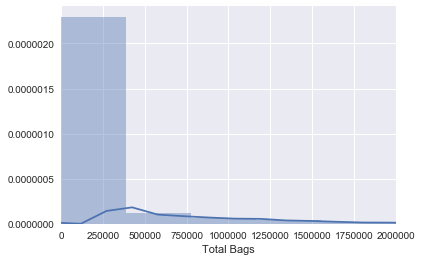

In [19]:
sns.distplot(df['Total Bags'])
plt.xlim(0,2000000)

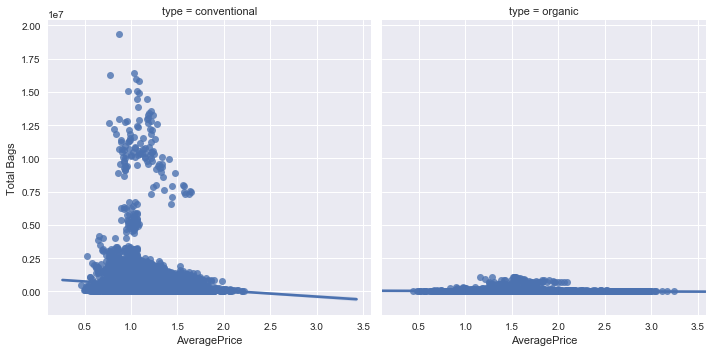

In [20]:
sns.lmplot(x='AveragePrice',y='Total Bags',data=df,col='type')

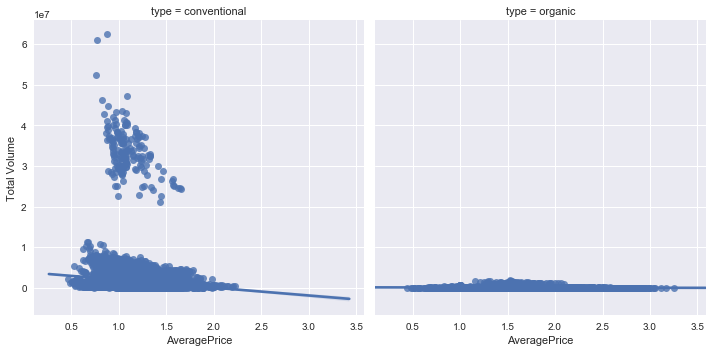

In [24]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=df,col='type')

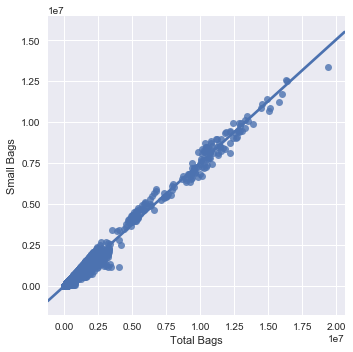

In [25]:
sns.lmplot(x='Total Bags',y='Small Bags',data=df)

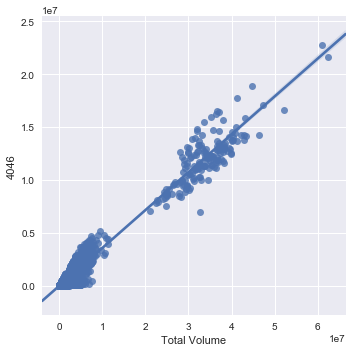

In [26]:
sns.lmplot(x='Total Volume',y='4046',data=df)

In [126]:
df.loc[:,['AveragePrice','Total Volume']].corr()

,AveragePrice,Total Volume
AveragePrice,1.000000,-0.192752
Total Volume,-0.192752,1.000000


In [127]:
df.loc[:,['AveragePrice','Total Bags']].corr()

,AveragePrice,Total Bags
AveragePrice,1.000000,-0.177088
Total Bags,-0.177088,1.000000


In [128]:
df.loc[:,['Total Bags','Total Volume']].corr()

,Total Bags,Total Volume
Total Bags,1.000000,0.963047
Total Volume,0.963047,1.000000


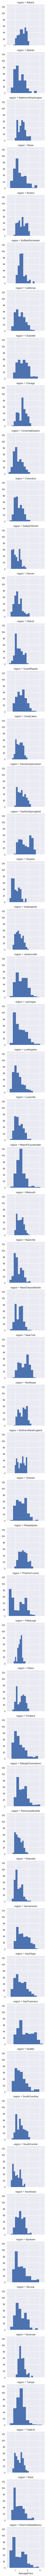

In [26]:
g=sns.FacetGrid(df,row='region')
g=g.map(plt.hist,'AveragePrice')

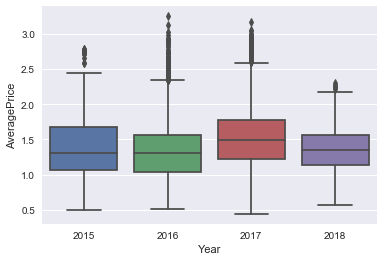

In [27]:
sns.boxplot(y=df['AveragePrice'],x=df['Year'])

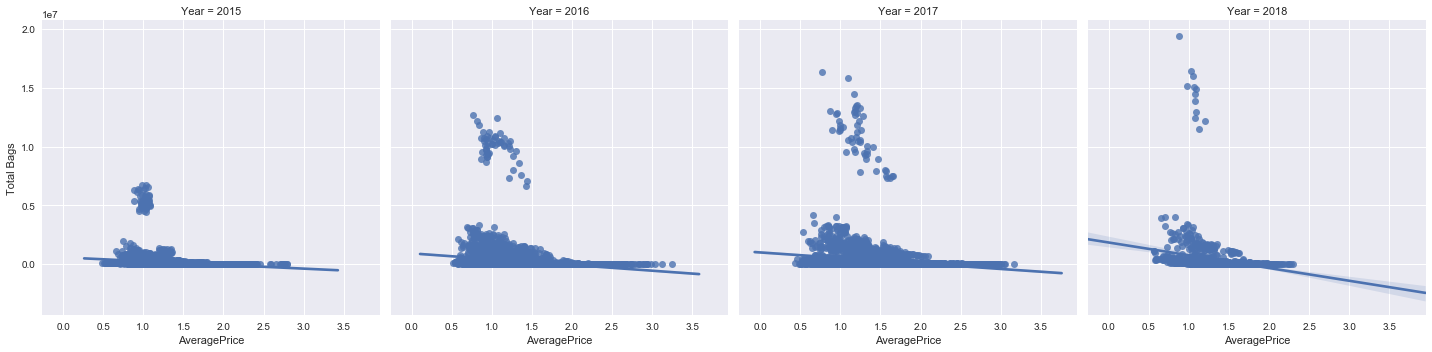

In [31]:
sns.lmplot(x='AveragePrice',y='Total Bags',data=df,col='Year')

In [32]:
df['Total Bags'].sort_values()

11594           0.00
11321           0.00
11320           0.00
11595           0.00
11024           0.00
            ...     
8353     15804696.31
9091     15972492.07
8366     16298296.29
9090     16394524.11
9097     19373134.37
Name: Total Bags, Length: 18249, dtype: float64

In [33]:
ManyBags=df[df["Total Bags"]>500000.00]

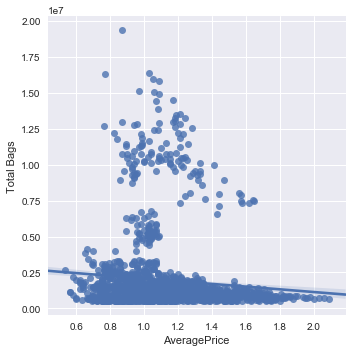

In [34]:
sns.lmplot(x='AveragePrice',y='Total Bags', data=ManyBags)

In [35]:
ManyBags['region'].value_counts()

TotalUS          253
SouthCentral     169
Northeast        169
West             169
California       168
GreatLakes       166
Southeast        160
Midsouth         160
LosAngeles       125
Plains            54
Houston           22
NewYork           22
Denver            17
Portland          15
Seattle           14
DallasFtWorth      6
Chicago            1
PhoenixTucson      1
Name: region, dtype: int64

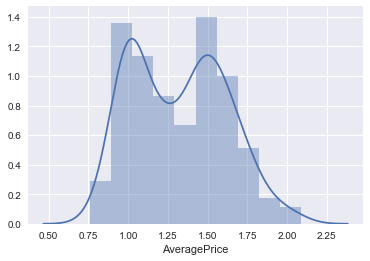

In [36]:
us=df[df['region']=='TotalUS']
sns.distplot(us['AveragePrice'])

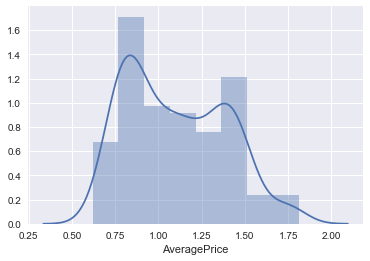

In [37]:
sc=df[df['region']=='SouthCentral']
sns.distplot(sc['AveragePrice'])

(500000, 10000000)

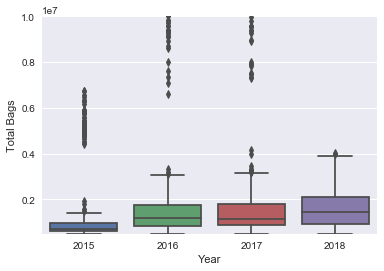

In [38]:
sns.boxplot(y=ManyBags['Total Bags'],x=ManyBags['Year'])
plt.ylim(500000,10000000)

In [39]:
df[df['AveragePrice']<1]['region'].value_counts()

Houston                179
DallasFtWorth          155
PhoenixTucson          150
WestTexNewMexico       148
SouthCentral           148
West                   111
Nashville              109
LosAngeles             107
CincinnatiDayton       102
Portland                95
Denver                  88
LasVegas                84
Columbus                77
Boise                   73
SanDiego                72
Atlanta                 69
NewOrleansMobile        65
Detroit                 64
California              62
Roanoke                 61
Louisville              59
Spokane                 53
TotalUS                 53
Seattle                 50
Indianapolis            48
StLouis                 44
Jacksonville            44
Tampa                   43
Southeast               42
Orlando                 39
MiamiFtLauderdale       38
RichmondNorfolk         36
GrandRapids             31
SouthCarolina           26
GreatLakes              24
Plains                  24
Charlotte               16
R

In [40]:
houston=df[df['region']=='Houston']

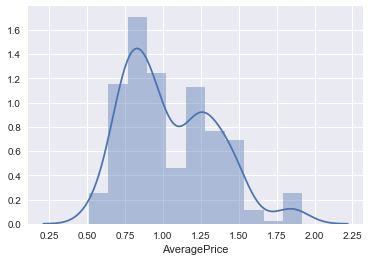

In [41]:
sns.distplot(houston['AveragePrice'])

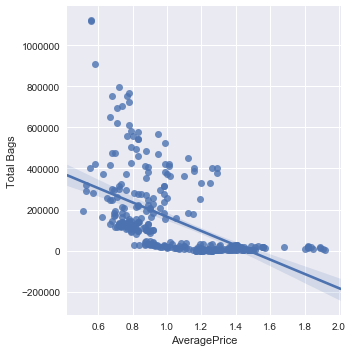

In [43]:
sns.lmplot(x='AveragePrice',y='Total Bags', data=houston)

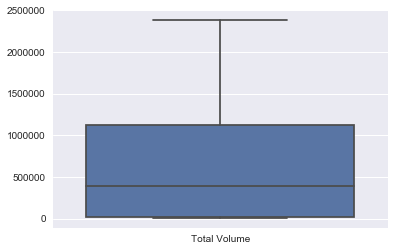

In [44]:
sns.boxplot(data=houston.loc[:,['Total Volume','region']])

In [47]:
houston.type.value_counts()

organic         169
conventional    169
Name: type, dtype: int64

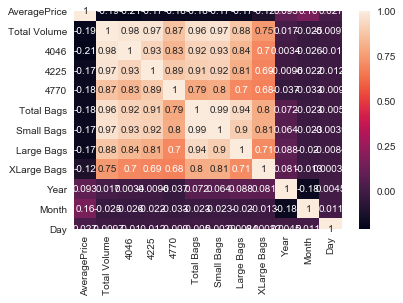

In [46]:
sns.heatmap(df.corr(),annot=True)